### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [450]:
import os
os.getcwd()
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'LCDataDictionary.xlsx',
 'Lego_Dillema_student_template.ipynb',
 'sample_submission_lego.csv',
 'test_lego.csv',
 'train_lego.csv']

In [451]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")


In [452]:
# Code starts here
# read data
train = pd.read_csv('train_lego.csv')
test = pd.read_csv('test_lego.csv')
train.head()
test.head()











# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [453]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               8582 non-null   int64  
 1   list_price         8582 non-null   float64
 2   num_reviews        8582 non-null   int64  
 3   piece_count        8582 non-null   int64  
 4   play_star_rating   8582 non-null   float64
 5   review_difficulty  8582 non-null   int64  
 6   star_rating        8582 non-null   float64
 7   theme_name         8582 non-null   int64  
 8   val_star_rating    8582 non-null   float64
 9   country            8582 non-null   int64  
 10  Id                 8582 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 737.6 KB


In [454]:
train.shape

(8582, 11)

In [455]:
test.shape

(3679, 10)

In [456]:
sample = pd.read_csv('sample_submission_lego.csv')
sample.head()

,Id,list_price
0,9907,0
1,5243,0
2,8276,0
3,6501,0
4,1619,0


In [457]:
y = train['list_price']

In [458]:
Id = train['Id']

Text(0.5, 1.0, 'Distribution of target variable')

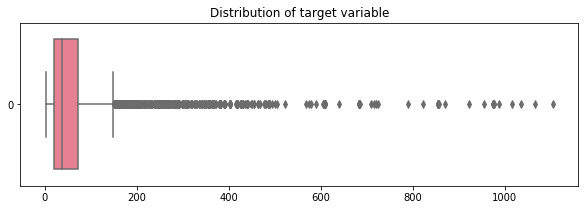

In [459]:
# Target Variable distribution
plt.figure(figsize=(10,3))
sns.boxplot(data = train['list_price'], orient='horizontal', palette='husl')
plt.title("Distribution of target variable")

In [460]:
train.describe().drop(['list_price','Id'], axis=1)

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211
std,8.186261,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000
50%,19.000000,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000
75%,23.000000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000
max,30.000000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000


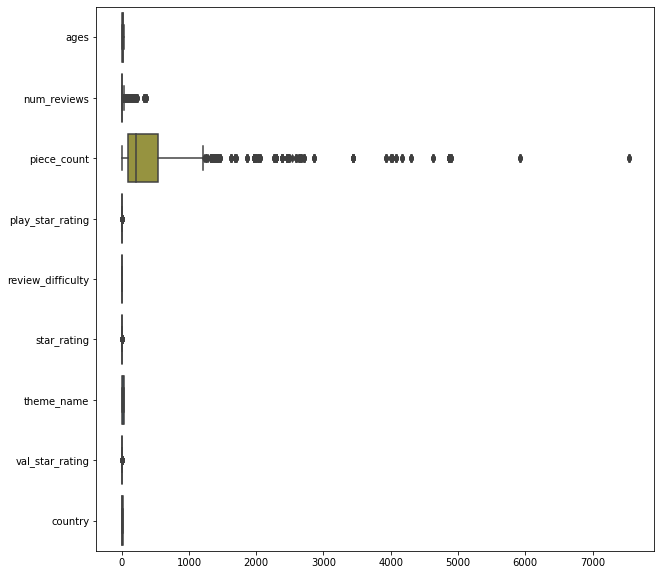

In [461]:
# Feature variables distribution
plt.figure(figsize=(10,10))
sns.boxplot(data=train.drop(columns=['list_price','Id']), orient='horizontal', palette='husl')

In [462]:
train = train.loc[:, ~train.columns.isin(['list_price','Id'])]
train.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,202,2469,4.7,1,4.9,9,4.7,7
1,26,9,252,4.8,0,4.6,39,4.6,20
2,26,56,659,4.6,0,4.6,34,3.9,4
3,11,1,19,3.0,5,4.0,13,4.0,10
4,7,84,4016,4.5,1,3.9,34,3.5,10


In [494]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(train)
train.loc[:,:] = scaled_values

In [495]:
train.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,0.266667,0.550409,0.327321,0.94,0.2,0.98,0.225,0.94,0.35
1,0.866667,0.024523,0.033289,0.96,0.0,0.92,0.975,0.92,1.00
2,0.866667,0.152589,0.087268,0.92,0.0,0.92,0.850,0.78,0.20
3,0.366667,0.002725,0.002387,0.60,1.0,0.80,0.325,0.80,0.50
4,0.233333,0.228883,0.532493,0.90,0.2,0.78,0.850,0.70,0.50


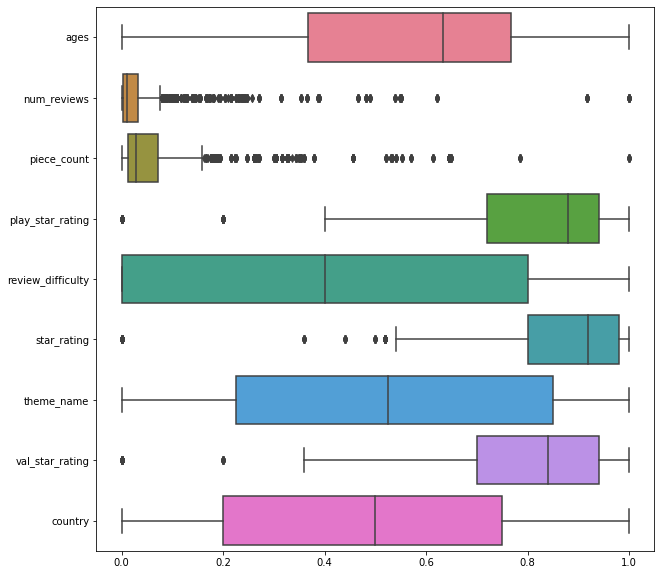

In [496]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train, orient='horizontal', palette='husl')

In [466]:
train.corr()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.160969,-0.090685,0.232847,-0.239683,0.102633,0.476178,0.116349,-0.001526
num_reviews,-0.160969,1.000000,0.542924,0.151801,-0.196846,0.160762,0.012342,0.172431,0.001953
piece_count,-0.090685,0.542924,1.000000,0.174411,-0.312239,0.180903,0.173318,0.192863,0.002506
play_star_rating,0.232847,0.151801,0.174411,1.000000,-0.670508,0.902573,0.151078,0.921824,-0.000958
review_difficulty,-0.239683,-0.196846,-0.312239,-0.670508,1.000000,-0.637901,-0.153948,-0.650333,0.006417
star_rating,0.102633,0.160762,0.180903,0.902573,-0.637901,1.000000,0.065264,0.908720,-0.003865
theme_name,0.476178,0.012342,0.173318,0.151078,-0.153948,0.065264,1.000000,0.097430,-0.003625
val_star_rating,0.116349,0.172431,0.192863,0.921824,-0.650333,0.908720,0.097430,1.000000,0.002413
country,-0.001526,0.001953,0.002506,-0.000958,0.006417,-0.003865,-0.003625,0.002413,1.000000


In [467]:
X= train.drop(['play_star_rating','val_star_rating'], axis=1)

In [468]:
#X = train.drop(['list_price','Id'], axis=1)

In [469]:
X.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
0,0.266667,0.550409,0.327321,0.2,0.98,0.225,0.35
1,0.866667,0.024523,0.033289,0.0,0.92,0.975,1.00
2,0.866667,0.152589,0.087268,0.0,0.92,0.850,0.20
3,0.366667,0.002725,0.002387,1.0,0.80,0.325,0.50
4,0.233333,0.228883,0.532493,0.2,0.78,0.850,0.50


In [470]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state =6)

In [471]:
X_train.shape

(6007, 7)

In [472]:
y_train.shape

(6007,)

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

IndexError: index 7 is out of bounds for axis 0 with size 7

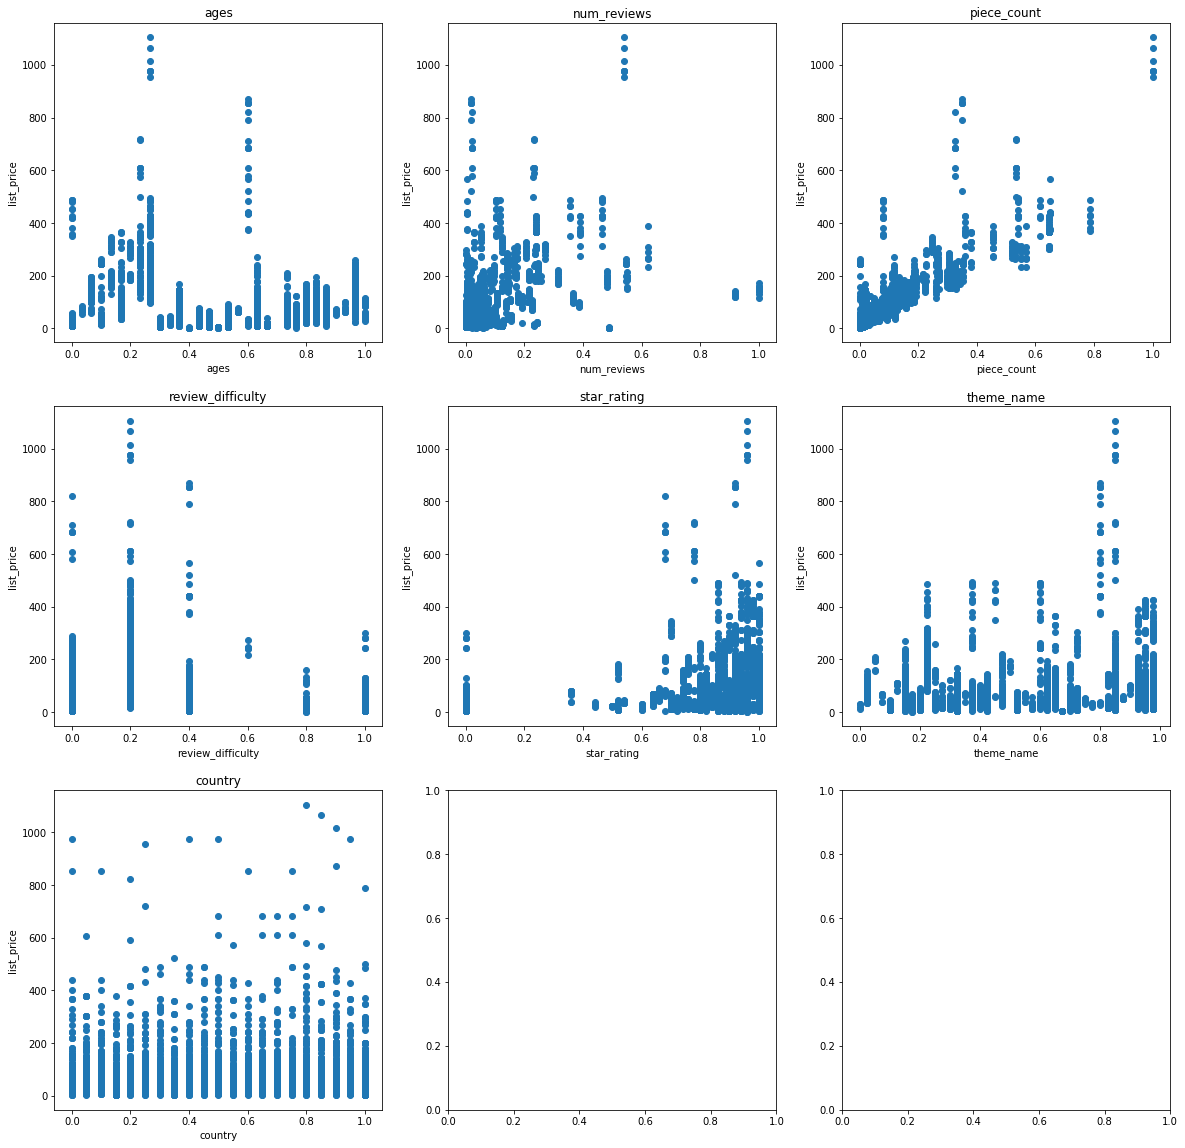

In [474]:
# Code starts here
cols = X_train.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3):
        col = cols[i*3 +j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col], y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')


plt.show()

In [475]:
X_train.corr()








# Code ends here.

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
ages,1.000000,-0.162116,-0.087653,-0.248484,0.102732,0.477431,-0.016430
num_reviews,-0.162116,1.000000,0.550229,-0.197409,0.163444,0.017316,0.009128
piece_count,-0.087653,0.550229,1.000000,-0.312137,0.180946,0.173384,0.009986
review_difficulty,-0.248484,-0.197409,-0.312137,1.000000,-0.641694,-0.162326,0.000894
star_rating,0.102732,0.163444,0.180946,-0.641694,1.000000,0.062220,-0.007335
theme_name,0.477431,0.017316,0.173384,-0.162326,0.062220,1.000000,-0.018460
country,-0.016430,0.009128,0.009986,0.000894,-0.007335,-0.018460,1.000000


### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [476]:
# Code starts here











# Code ends here.

In [477]:
X_train.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
5994,0.433333,0.000000,0.011141,1.0,0.00,0.525,0.00
2437,0.366667,0.002725,0.001857,0.4,0.80,0.325,0.50
2529,0.833333,0.010899,0.055836,0.0,0.96,0.200,1.00
5865,0.233333,0.547684,0.264589,0.2,0.96,0.850,0.95
1899,0.533333,0.049046,0.028647,0.4,0.52,0.425,0.15


In [478]:
X_train['list_price']= y_train

In [479]:
X_train.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country,list_price
5994,0.433333,0.000000,0.011141,1.0,0.00,0.525,0.00,36.5878
2437,0.366667,0.002725,0.001857,0.4,0.80,0.325,0.50,18.2878
2529,0.833333,0.010899,0.055836,0.0,0.96,0.200,1.00,39.9900
5865,0.233333,0.547684,0.264589,0.2,0.96,0.850,0.95,243.9878
1899,0.533333,0.049046,0.028647,0.4,0.52,0.425,0.15,31.1922


In [480]:
# Run ols summary stats 
model_ols = ols("""list_price ~ ages 
                        + num_reviews 
                        + piece_count
                        + review_difficulty 
                        + star_rating 
                        + theme_name
                        + country""", 
                        data=X_train).fit()

In [481]:
model_summary = model_ols.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2841.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:48:47   Log-Likelihood:                -31015.
No. Observations:                6007   AIC:                         6.205e+04
Df Residuals:                    5999   BIC:                         6.210e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            40.5399      3.087     13.132      0.000      34.488      46.592
ages                -17.1496      2.428     -7.062      0.000     -21.910     -12.389
num_reviews         -27.2433      7.040     -3.870      0.000     -41.045     -13.442
piece_count         713.7238      6.566    108.693      0.000     700.851     726.596
review_difficulty   -19.1292      2.134     -8.962      0.000     -23.313     -14.945
star_rating         -19.5853      2.201     -8.900      0.000     -23.899     -15.271
theme_name           18.1992      2.155      8.444      0.000      13.974      22.424
country               3.7756      1.768      2.136      0.033       0.310       7.241
==============================================================================
Omnibus:                     6929.530   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1068989.777
Skew:                           5.873   Prob(JB):                         0.00
Kurtosis:                      67.288   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

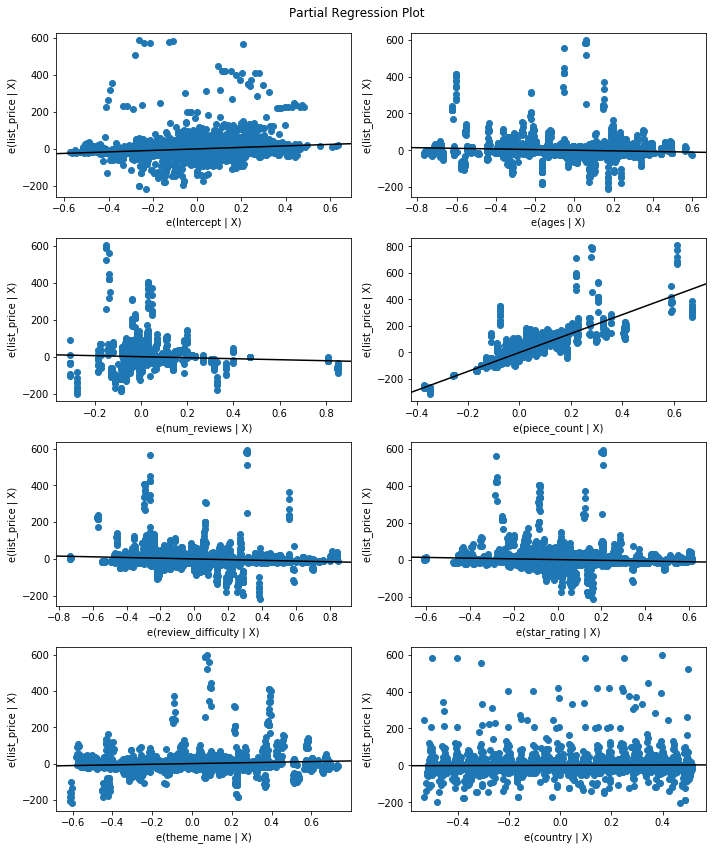

In [482]:
fig = plt.figure(figsize=(10,12))
fig = sm.graphics.plot_partregress_grid(model_ols, fig=fig)

In [483]:
error = y_val - y_pred
error_info = pd.DataFrame({'y_true': y_val, 'y_pred': y_pred, 'error': error}, columns=['y_val', 'y_pred', 'error'])

Text(0, 0.5, 'Residual')

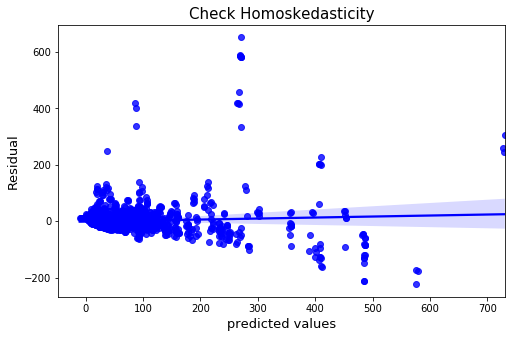

In [484]:
plt.figure(figsize=(8,5))
g = sns.regplot(x="y_pred", y="error", data=error_info, color='blue')
g.set_title('Check Homoskedasticity', fontsize=15)
g.set_xlabel("predicted values", fontsize=13)
g.set_ylabel("Residual", fontsize=13)

Text(0, 0.5, 'Residual')

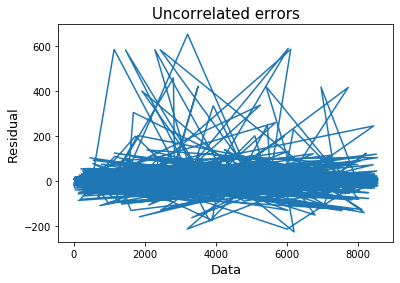

In [485]:
ax = error_info.error.plot()
ax.set_title('Uncorrelated errors', fontsize=15)
ax.set_xlabel("Data", fontsize=13)
ax.set_ylabel("Residual", fontsize=13)

Text(0, 0.5, 'Ordered Values')

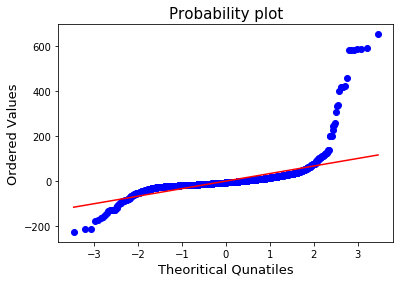

In [488]:
fig, ax = plt.subplots(figsize=(6,4))
_ = sp.stats.probplot(error_info.error, plot=ax, fit=True)
ax.set_title('Probability plot', fontsize=15)
ax.set_xlabel("Theoritical Qunatiles", fontsize=13)
ax.set_ylabel("Ordered Values", fontsize=13)

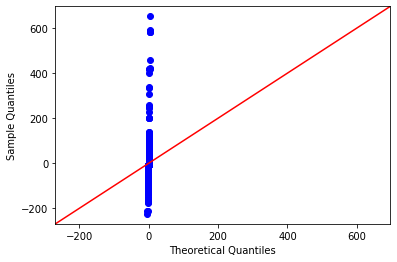

In [489]:
ax = sm.qqplot(error_info.error, line='45')
plt.show()

### Model building

In [490]:
# Code starts here

model = LinearRegression()
model.fit(X_train.drop(['list_price'], axis=1), y_train)
y_pred = model.predict(X_val)
print(mean_squared_error(y_pred,y_val ))
print(r2_score(y_pred, y_val))









# Code ends here.

2385.6155401803835
0.6093363841093516


In [ ]:
# Different algorithm selection may solve the R-squared problem

### Residual check!

- Check the distribution of the residual.

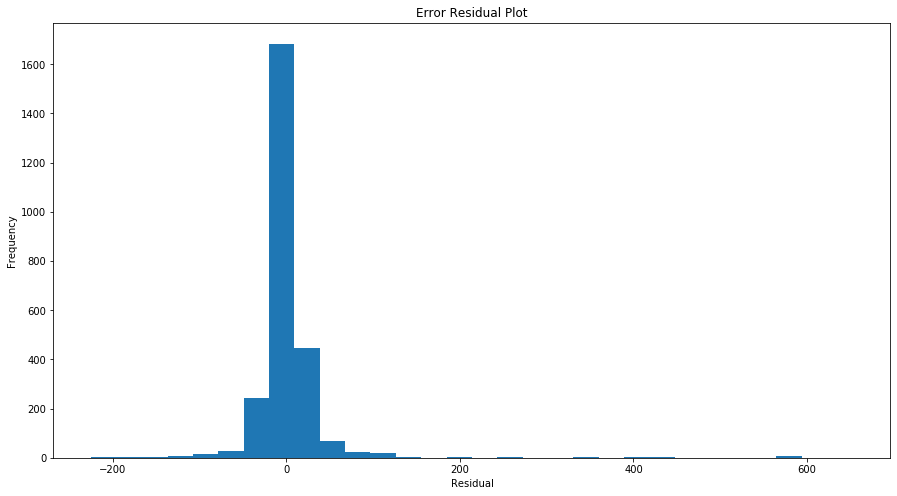

In [491]:
# Code starts here
residual = (y_val - y_pred)
plt.figure(figsize=(15,8))
plt.hist(residual,bins=30)
plt.xlabel("Residual")
plt.ylabel('Frequency')
plt.title("Error Residual Plot")
plt.show()











# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [492]:
# Code starts here
Id = test['Id']
test =test.drop(['play_star_rating','val_star_rating','Id'], axis=1)













# Code ends here.

In [493]:
test.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
0,26,8,941,0,4.6,33,16
1,11,0,19,5,0.0,13,7
2,29,34,1376,1,4.3,34,12
3,26,0,369,5,0.0,28,9
4,11,1,19,5,4.0,13,0


In [513]:
Id.head()

0    9907
1    5243
2    8276
3    6501
4    1619
Name: Id, dtype: int64

In [497]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(test)
test.loc[:,:] = scaled_values

In [498]:
test.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
0,0.866667,0.021798,0.124668,0.0,0.92,0.825,0.80
1,0.366667,0.000000,0.002387,1.0,0.00,0.325,0.35
2,0.966667,0.092643,0.182361,0.2,0.86,0.850,0.60
3,0.866667,0.000000,0.048806,1.0,0.00,0.700,0.45
4,0.366667,0.002725,0.002387,1.0,0.80,0.325,0.00


In [501]:
y_pred_test = model.predict(test)


In [525]:
submission = pd.DataFrame({'Id':Id,
                           'list_price': y_pred_test})

In [526]:
submission

,Id,list_price
0,9907,114.078263
1,5243,24.062639
2,8276,148.658779
3,6501,55.820522
4,1619,6.998705
...,...,...
3674,2144,11.256610
3675,7242,72.334906
3676,11631,26.211068
3677,4639,16.395276


In [ ]:
submission = submission.set_index('Id')

In [532]:
submission

,list_price
Id,
9907,114.078263
5243,24.062639
8276,148.658779
6501,55.820522
1619,6.998705
...,...
2144,11.256610
7242,72.334906
11631,26.211068


In [533]:
submission.to_csv('submission.csv')